In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import fsolve


In [10]:
# IPR dataset

ipr = pd.DataFrame({'Pwf':[4000,3500,3000,2500,2000,1500,1000,500,14.7],
                    'Q': [0,1999,3094,3902,4512,4963,5275,5458,5519]})

ipr

,Pwf,Q
0,4000.0,0
1,3500.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


In [16]:
q = np.arange(1000, 6500, 500)


In [17]:
p_190 =   [1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]
p_2375 =  [1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]
p_2875 =  [1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]


In [18]:
tpr = pd.DataFrame({
    'q': q,
    'Pwf(1.90" tbg)': p_190,
    'Pwf(2.375"tbg)': p_2375,
    'Pwf(2.875"tbg)': p_2875
})


In [19]:
ipr_func = interp1d(ipr['Q'], ipr['Pwf'], kind='cubic', fill_value='extrapolate')


In [20]:
tpr_funcs = {
    '1.90" tubing': interp1d(tpr['q'], tpr['Pwf(1.90" tbg)'], kind='cubic', fill_value='extrapolate'),
    '2.375" tubing': interp1d(tpr['q'], tpr['Pwf(2.375"tbg)'], kind='cubic', fill_value='extrapolate'),
    '2.875" tubing': interp1d(tpr['q'], tpr['Pwf(2.875"tbg)'], kind='cubic', fill_value='extrapolate')
}


In [21]:
def find_intersection(tpr_func):
    def difference(q):
        return ipr_func(q) - tpr_func(q)
    q_guess = 4000
    q_op = fsolve(difference, q_guess)[0]
    pwf_op = ipr_func(q_op)
    return q_op, pwf_op


In [22]:
operating_points = {label: find_intersection(func) for label, func in tpr_funcs.items()}


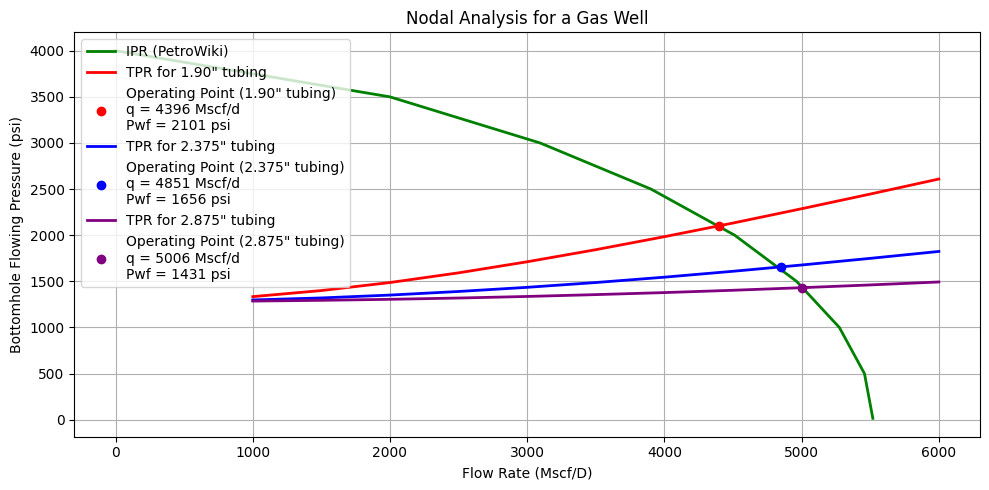

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(ipr['Q'], ipr['Pwf'], label='IPR (PetroWiki)', linewidth=2, color='green')
colors = ['red', 'blue', 'purple']
for i, (label, func) in enumerate(tpr_funcs.items()):
    plt.plot(tpr['q'], func(tpr['q']), label=f'TPR for {label}', linewidth=2, color=colors[i])
    q_op, pwf_op = operating_points[label]
    plt.plot(q_op, pwf_op, 'o', label=f'Operating Point ({label})\nq = {q_op:.0f} Mscf/d\nPwf = {pwf_op:.0f} psi', color=colors[i])
plt.xlabel('Flow Rate (Mscf/D)')
plt.ylabel('Bottomhole Flowing Pressure (psi)')
plt.title('Nodal Analysis for a Gas Well')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

